<a href="https://colab.research.google.com/github/gbam-ds/FinalProject_IntroPython/blob/main/CDAN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
 answer = pd.read_csv(r"/content/drive/MyDrive/archive/Answers.csv", encoding = 'latin-1', nrows=1000)
 quest = pd.read_csv(r"/content/drive/MyDrive/archive/Questions.csv", encoding = 'latin-1', nrows=1000)
 tags = pd.read_csv(r"/content/drive/MyDrive/archive/Tags.csv", encoding = 'latin-1', nrows=1000)

In [ ]:
answer.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [ ]:
quest.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [4]:
novo = pd.merge(quest,answer, how="left", left_on = "Id", right_on="ParentId")

In [ ]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [5]:
df = pd.merge(novo, tags, how="left", left_on = "Id_x", right_on="Id")

In [6]:
df.head()

,Id_x,OwnerUserId_x,CreationDate_x,ClosedDate,Score_x,Title,Body_x,Id_y,OwnerUserId_y,CreationDate_y,ParentId,Score_y,Body_y,Id,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,80.0,12.0,<p>I wound up using this. It is a kind of a ha...,80.0,flex
1,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,80.0,12.0,<p>I wound up using this. It is a kind of a ha...,80.0,actionscript-3
2,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,124.0,26.0,2008-08-01T16:09:47Z,80.0,12.0,<p>I wound up using this. It is a kind of a ha...,80.0,air
3,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,80.0,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",80.0,flex
4,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,10008.0,1109.0,2008-08-13T16:09:09Z,80.0,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",80.0,actionscript-3


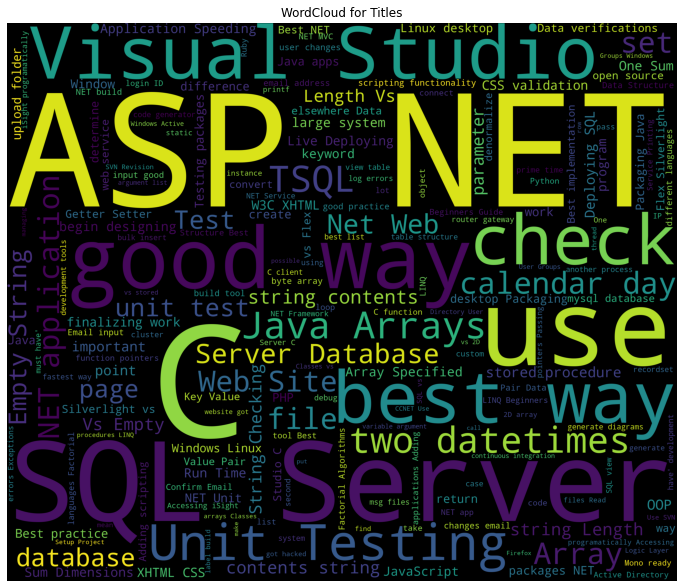

In [ ]:
#principais palavras
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(df['Title'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud for Titles")
plt.show()

# Trabalho 2


In [14]:
tags["Tag"] = tags["Tag"].astype(str)

grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.reset_index()

grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})


In [15]:
df = quest.merge(grouped_tags_final, on = "Id")

In [18]:
import nltk

flat_list = [item for sublist in df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [23]:
from bs4 import BeautifulSoup
df['Body'] =df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [26]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [27]:
df['Body'] = df['Body'].apply(lambda x: clean_text(x)) 

In [57]:
X1 = df["Body"]
X2 = df["Title"]
y = df['Tags']

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [58]:
X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)

In [60]:
from scipy.sparse import hstack

X_tfidf = hstack([X1_tfidf,X2_tfidf])

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0)

In [69]:
from sklearn.metrics import hamming_loss

def avg_jacard(y_true,y_pred):
    
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")    

In [70]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multiclass import OneVsRestClassifier


In [71]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


Clf:  DummyClassifier
Jacard score: 51.2177105318778
Hamming loss: 19.54560641496826
---
Clf:  SGDClassifier
Jacard score: 52.20819119903051
Hamming loss: 19.011025726695625
---
Clf:  LogisticRegression
Jacard score: 52.49444582823861
Hamming loss: 18.910791847644504
---
Clf:  MultinomialNB
Jacard score: 53.22053633183239
Hamming loss: 18.643501503508187
---
Clf:  LinearSVC
Jacard score: 54.145223476779094
Hamming loss: 18.10892081523555
---
Clf:  Perceptron
Jacard score: 50.97841765921506
Hamming loss: 19.94654193117274
---
Clf:  PassiveAggressiveClassifier
Jacard score: 53.15071837018872
Hamming loss: 18.610090210491144
---


In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 51.192706055083605
Hamming loss: 19.34513865686602
---
